# **total Alternative Splicing by Tissue Dot plot**

This notebook generates a single figure, the reverse plot of showing the number of alternative splicing by tissue.

1. Get differential gene expression (DGE) files
2. Use the ``../assets/tissues.tsv`` to limit the tissues to those with at least 50 samples in each sex (``tissues.tsv`` was produced by a Python script)
3. Use the pattern for the differentially expressed genes **"../data/*DGE.csv"** to get all the values for the matrix.

## **Running this notebook**:

See the README for setting up prerequisites for the notebook.

## 1. Setup 

Assumes the `countGenesAndEvents.ipynb` notebook was run -- unpacking the results from the differential Gene Expression Analysis as run in the `differentialGeneExpressionAnalysis.ipynb` notebook.

In [1]:
defaultW <- getOption("warn")  # suppress warnings for this cell
options(warn = -1) 

library(stringr)
library(magrittr)
library(dplyr)
library(ggplot2)
library(scales)
library(viridis)

Sys.setenv(TAR = "/bin/tar") # for gzfile

options(warn = defaultW)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




## 2 read in the total alternatives splicing by tissue file.

In [2]:
totals <- read.table("../data/Total_AS_by_tissue.tsv", sep = "\t", header = T)

colnames(totals) <- c("Tissue", "Total")
totals_s <- totals %>% arrange(Total)
totals_s$Tissue <- factor(totals_s$Tissue, levels = totals_s$Tissue)
levels(totals_s$Tissue)

[1] "Sigmoid colon"         "Frontal cortex"        "Cerebellar hemisphere"
 [4] "Putamen"               "Hypothalamus"          "Spinal cord"          
 [7] "Caudate"               "Small intestine"       "Transverse colon"     
[10] "Whole blood"           "Coronary artery"       "EBV-lymphocytes"      
[13] "Left ventricle"        "Stomach"               "Cortex"               
[16] "Tibial nerve"          "Atrial appendage"      "Esophagus (gej)"      
[19] "Lung"                  "Pancreas"              "Esophagus (m)"        
[22] "Skin (not exposed)"    "Cerebellum"            "Hippocampus"          
[25] "Liver"                 "Adrenal gland"         "Tibial artery"        
[28] "Adipose (v)"           "Spleen"                "Skin (exposed)"       
[31] "Pituitary"             "Adipose (sc)"          "Skeletal muscle"      
[34] "Fibroblasts"           "Thyroid"               "Aorta"                
[37] "Esophagus (mu)"        "Nucleus accumbens"     "Breast"

## 3 create a function to be used by ggplot to create a reverse log10 scale for the x-axis

In [3]:
reverselog_trans <- function(base = exp(1)) {
  trans <- function(x) -log(x, base)
  inv <- function(x) base^(-x)
  trans_new(paste0("reverselog-", format(base)), trans, inv, 
            log_breaks(base = base), 
            domain = c(1e-100, Inf))
}


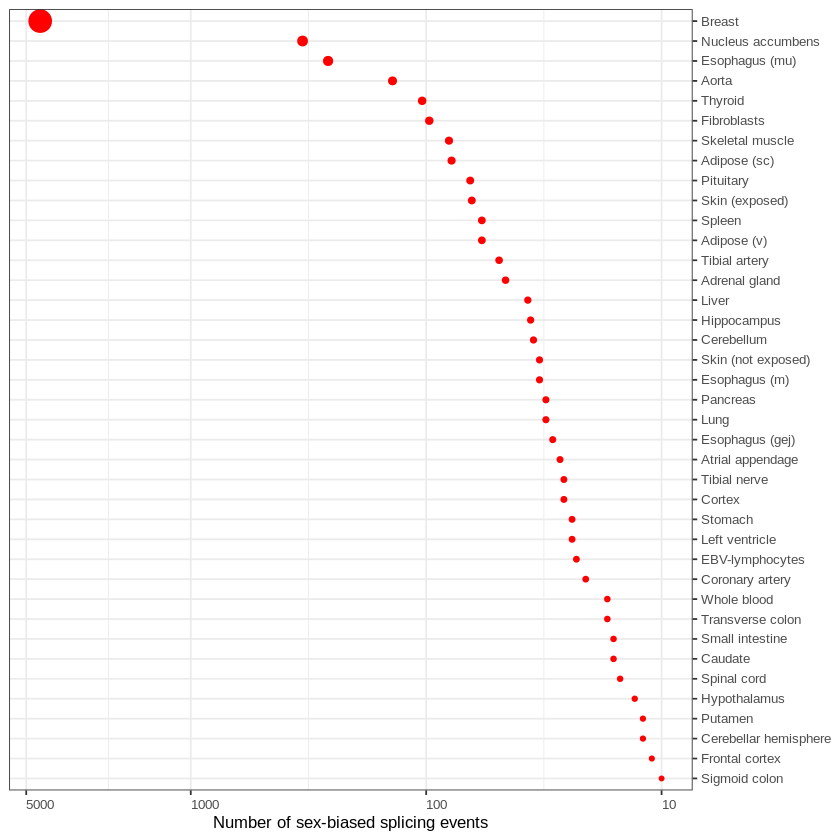

In [4]:
g<-ggplot(totals_s, aes(y = Tissue, x = Total, size = Total)) +
  geom_point(color = "red") +
  theme_bw() +
  scale_x_continuous(trans=reverselog_trans(), breaks=c(1,10,100,1000,5000,10000)) +#breaks=c(10000, 5000,1000,100,10,1)) +
  scale_y_discrete(position = "right") +
  theme(axis.text.x = element_text(size=8, angle = 0, hjust = 0.0, vjust = 0.5),
        axis.text.y = element_text(size=8),
        axis.title.x = element_text(face="plain", colour="black", 
                                    size=10),
        axis.title.y = element_blank(),
        legend.title=element_blank(),
        legend.text = element_text(face="plain", colour="black", 
                                   size=8)) +
  xlab(paste("Number of sex-biased splicing events")) +
  ylab("Tissue") + 
  guides(size=FALSE)

g
ggsave("../pdf/total_as_by_tissue.pdf",g, height = 4.5, width = 4)

## Appendix - Metadata

For replicability and reproducibility purposes, we also print the following metadata:

### Appendix.1. Checksums with the sha256 algorithm
1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

In [5]:
figure_id   = "totalAlternativeSplicingByTissue"

### Appendix.2. Library metadata

In [6]:
dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", figure_id, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", figure_id ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]

Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..

Done!


Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..

Done!




 setting  value                       
 version  R version 3.6.2 (2019-12-12)
 os       Ubuntu 18.04.3 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language en_US.UTF-8                 
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2020-06-22                  

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
dplyr,dplyr,0.8.4,0.8.4,/opt/conda/lib/R/library/dplyr,/opt/conda/lib/R/library/dplyr,TRUE,FALSE,2020-01-31,CRAN (R 3.6.2),NA,/opt/conda/lib/R/library
ggplot2,ggplot2,3.2.1,3.2.1,/opt/conda/lib/R/library/ggplot2,/opt/conda/lib/R/library/ggplot2,TRUE,FALSE,2019-08-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
magrittr,magrittr,1.5,1.5,/opt/conda/lib/R/library/magrittr,/opt/conda/lib/R/library/magrittr,TRUE,FALSE,2014-11-22,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
scales,scales,1.1.0,1.1.0,/opt/conda/lib/R/library/scales,/opt/conda/lib/R/library/scales,TRUE,FALSE,2019-11-18,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
stringr,stringr,1.4.0,1.4.0,/opt/conda/lib/R/library/stringr,/opt/conda/lib/R/library/stringr,TRUE,FALSE,2019-02-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
viridis,viridis,0.5.1,0.5.1,/opt/conda/lib/R/library/viridis,/opt/conda/lib/R/library/viridis,TRUE,FALSE,2018-03-29,CRAN (R 3.6.3),NA,/opt/conda/lib/R/library
viridisLite,viridisLite,0.3.0,0.3.0,/opt/conda/lib/R/library/viridisLite,/opt/conda/lib/R/library/viridisLite,TRUE,FALSE,2018-02-01,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
